# Bay Area Bike Share Analysis

## Introduction


[Bay Area Bike Share](http://www.bayareabikeshare.com/) is a company that provides on-demand bike rentals for customers 
in San Francisco, Redwood City, Palo Alto, Mountain View, and San Jose. Users can unlock bikes from a variety of stations throughout each city, and return them to any station within the same city. Users pay for the service either through a 
yearly subscription or by purchasing 3-day or 24-hour passes. Users can make an unlimited number of trips, with trips 
under thirty minutes in length having no additional charge; longer trips will incur overtime fees.

In this project, we will put yourself in the shoes of a data analyst performing an exploratory analysis on the data. 
We will take a look at two of the major parts of the data analysis process: data wrangling and exploratory data analysis. 
But before we even start looking at data, let's think about some questions you might want to understand about the bike 
share data. Consider, for example, if we were working for Bay Area Bike Share: what kinds of information would we want 
to know about in order to make smarter business decisions? Or we might think about if we were a user of the bike share 
service. What factors might influence how we would want to use the service?

Let's think about at least two questions that could be answered by data.

**Answer**: From Bay Area Bike Share's point of view, we could collect data and see which areas have high or low 
concentration of bike rentals. Depending on how many bikes are rented from or returned to each station, we could change 
the number of racks commensurate to the traffic at that station. Another application would be to look at areas of high 
vehicular traffic and introduce many bike stations there and incentivize customers to use bike rentals by say, offering a discount or a rewards program. One more would be to look at times of peak and low rental activity and correspondingly introduce surcharge or discounts for bike use. 

As a rider, I would like to see a real time display of the number of empty bike slots available on a given route either
on a dashboard on the bike or through a mobile app. 


## Using Visualizations to Communicate Findings in Data

As a data analyst, the ability to effectively communicate findings is a key part of the job. After all, our best analysis 
is only as good as our ability to communicate it.

In 2014, Bay Area Bike Share held an [Open Data Challenge](http://www.bayareabikeshare.com/datachallenge-2014) to encourage 
data analysts to create visualizations based on their open data set. You’ll create your own visualizations in this project, 
but first, take a look at the [submission winner for Best Analysis](http://thfield.github.io/babs/index.html) from Tyler 
Field. 

Let's consider what visualizations provide the most interesting insights? Can we answer either of the questions we 
identified above based on Tyler’s analysis? Why or why not?

**Answer:** The visualizations on rides grouped by day of the week and time of the day give a very good insight to
the major users of bike share. The question of  major routes and popular bike stations and times of low and high rental 
activity that were raised above have been answered in Tyler's analysis. Moreover the times and days of low and high bike 
rental activities agrees very well with Tyler's observation that majority of the users are commuters and use bike share primarily for commuting to and from work. (We come to a similar conclusion later in the project!) The findings however 
do not address the question of how many open slots are there at any given time on a given route. (This question is a 
bit harder to answer as it involves having real time data.)

Based on Tyler's findings, many measures could be taken to increase the revenue. One example would be to increase the 
number of bike slots at the most popular destinations, decrease the number of bike slots at least popular destinations. 
Another would be to incentivize users to use the bike share at less popular times as indicated before.



## Data Wrangling

Now it's time to explore the data. Let's take a look at Year 1 and Year 2 data from the Bay Area Bike Share's 
[Open Data](http://www.bayareabikeshare.com/open-data) page. The data comes in three parts: the first half of Year 1 
(files starting `201402`), the second half of Year 1 (files starting `201408`), and all of Year 2 (files starting 
`201508`). There are three main datafiles associated with each part: trip data showing information about each trip taken 
in the system (`*_trip_data.csv`), information about the stations in the system (`*_station_data.csv`), and daily weather 
data for each city in the system (`*_weather_data.csv`).

When dealing with a lot of data, it can be useful to start by working with only a sample of the data. This way, it will 
be much easier to check that our data wrangling steps are working since our code will take less time to complete. Once 
we are satisfied with the way things are working, we can then set things up to work on the dataset as a whole.

Since the bulk of the data is contained in the trip information, we should target looking at a subset of the trip data 
to help us get our bearings. Let's start by looking at only the first month of the bike trip data, from 2013-08-29 to 
2013-09-30. The code below will take the data from the first half of the first year, then write the first month's worth 
of data to an output file. This code exploits the fact that the data is sorted by date (though it should be noted that 
the first two days are sorted by trip time, rather than being completely chronological).


In [19]:
# import all necessary packages and functions.
import csv
from datetime import datetime
import numpy as np
import pandas as pd
from babs_datacheck import question_3
from babs_visualizations import usage_stats, usage_plot
from IPython.display import display
%matplotlib inline

In [21]:
# file locations
file_in  = '201402_trip_data.csv'
file_out = '201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # write rows from in-file to out-file until specified date reached
    while True:
        datarow = next(in_reader)
        # trip start dates in 3rd column, m/d/yyyy HH:MM formats
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

### Condensing the Trip Data

The first step is to look at the structure of the dataset to see if there's any data wrangling we should perform. The cell
below will read in the sampled data file that you created in the previous cell, and print out the first few rows of the 
table.

In [22]:
sample_data = pd.read_csv('201309_trip_data.csv')

display(sample_data.head())

,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In this exploration, we're going to concentrate on factors in the trip data that affect the number of trips that are taken. Let's focus down on a few selected columns: the trip duration, start time, start terminal, end terminal, and subscription type. Start time will be divided into year, month, and hour components. We will also add a column for the day of the week and abstract the start and end terminal to be the start and end city.

Let's tackle the lattermost part of the wrangling process first. Run the below code cell to see how the station information is structured, then observe how the code will create the station-city mapping. Note that the station mapping is set up as a function, `create_station_mapping()`. Since it is possible that more stations are added or dropped over time, this function will allow us to combine the station information across all three parts of our data when we are ready to explore everything.

In [23]:
# Display the first few rows of the station data file.
station_info = pd.read_csv('201402_station_data.csv')
display(station_info.head())

# This function will be called by another function later on to create the mapping.
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header row for each row's
            # dictionary keys
            weather_reader = csv.DictReader(f_in)

            for row in weather_reader:
                station_map[row['station_id']] = row['landmark']
    return station_map

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


We can now use the mapping to condense the trip data to the selected columns noted above. This will be performed in the `summarise_data()` function below. As part of this function, the `datetime` module is used to **p**arse the timestamp 
strings from the original data file as datetime objects (`strptime`), which can then be output in a different string
**f**ormat (`strftime`). The parsed objects also have a variety of attributes and methods to quickly obtain


In [24]:
def summarise_data(trip_in, station_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # generate dictionary of station - city mapping
    station_map = create_station_mapping(station_data)
    #print(station_map)

    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_city', 'end_city', 'subscription_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}
                    
                    # convert duration units from seconds to minutes
                    ### Question 3a: Add a mathematical operation below   ###
                    ### to convert durations from seconds to minutes.###
                    new_point['duration']=float(row['Duration'])/60 
                    
                    # reformat datestrings into multiple columns
                    ### Question 3b: Fill in the blanks below to generate ###
                    ### the expected time values.                         ###
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%Y-%m-%d')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['weekday']     = trip_date.strftime('%w')
                    
                    # remap start and end terminal with start and end city
                    new_point['start_city'] = station_map[row['Start Terminal']]
                    new_point['end_city'] = station_map[row['End Terminal']]
                    # two different column names for subscribers depending on file
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

The code block below will call the `summarise_data()` function we finished in the above cell. It will take the data 
contained in the files listed in the `trip_in` and `station_data` variables, and write a new file at the location 
specified in the `trip_out` variable.

In [25]:
# Process the data by running the function we wrote above.
station_data = ['201402_station_data.csv']
trip_in = ['201309_trip_data.csv']
trip_out = '201309_trip_summary.csv'
summarise_data(trip_in, station_data, trip_out)

# Load in the data file and print out the first few rows
sample_data = pd.read_csv(trip_out)
display(sample_data.head())

# Verify the dataframe by counting data points matching each of the time features.
question_3(sample_data)

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,4,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,4,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,4,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,4,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,4,San Francisco,San Francisco,Subscriber


All counts are as expected!



## Exploratory Data Analysis

Now that we have some data saved to a file, let's look at some initial trends in the data. In this section we'll walk 
through some of the things one can do with the functions, and we'll use the functions for ourselves in the last part of 
the project.

In [26]:
trip_data = pd.read_csv('201309_trip_summary.csv')

usage_stats(trip_data) #custom written stats function in babs_visualizations.py

There are 27345 data points in the dataset.
The average duration of trips is 27.60 minutes.
The median trip duration is 10.72 minutes.
25% of trips are shorter than 6.82 minutes.
25% of trips are longer than 17.28 minutes.


array([  6.81666667,  10.71666667,  17.28333333])

We see that there are over 27,000 trips in the first month, and that the average trip duration is larger than the 
median trip duration (the point where 50% of trips are shorter, and 50% are longer). In fact, the mean is larger than 
the 75% shortest durations. This will be interesting to look at later on.

Let's start looking at how those trips are divided by subscription type. One easy way to build an intuition about the 
data is to plot it. We'll use the `usage_plot()` function for this. The second argument of the function allows us to 
count up the trips across a selected variable, displaying the information in a plot. The expression below will show how many customer and how many subscriber trips were made. 

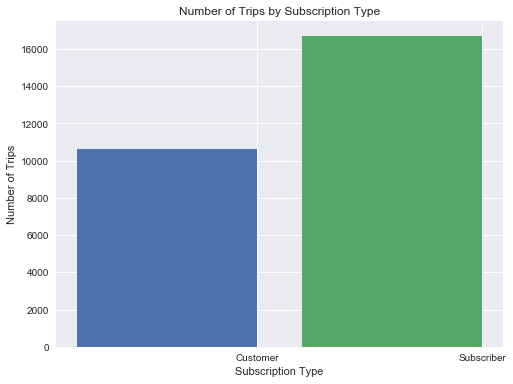

In [29]:
usage_plot(trip_data, 'subscription_type') #custom written plot function in babs_visualization.py

Seems like there's about 50% more trips made by subscribers in the first month than customers. Let's try a different variable now. What does the distribution of trip durations look like?

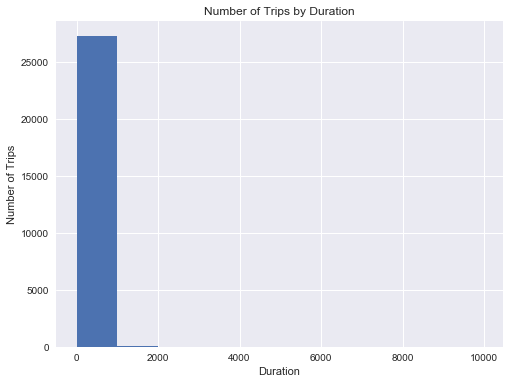

In [30]:
usage_plot(trip_data, 'duration')

Looks pretty strange, doesn't it? Let's take a look at the duration values on the x-axis. Most rides are expected to 
be 30 minutes or less, since there are overage charges for taking extra time in a single trip. The first bar spans 
durations up to about 1000 minutes, or over 16 hours. Based on the statistics we got out of `usage_stats()`, we should 
have expected some trips with very long durations that bring the average to be so much higher than the median: the plot 
shows this in a dramatic, but unhelpful way.

When exploring the data, we will often need to work with visualization function parameters in order to make the data 
easier to understand. Here's where the third argument of the `usage_plot()` function comes in. Filters can be set for 
data points as a list of conditions. Let's start by limiting things to trips of less than 60 minutes.

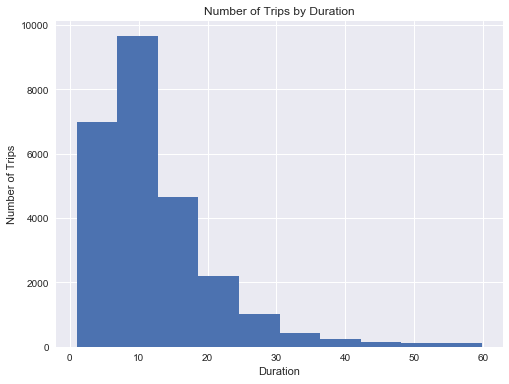

In [31]:
usage_plot(trip_data, 'duration', ['duration < 60'])

This is looking better! We can see that most trips are indeed less than 30 minutes in length, but there's more that 
we can do to improve the presentation. Since the minimum duration is not 0, the left hand bar is slighly above 0. We 
want to be able to tell where there is a clear boundary at 30 minutes, so it will look nicer if we have bin sizes and bin boundaries that correspond to some number of minutes. Fortunately, we can use the optional "boundary" and "bin_width" parameters to adjust the plot. By setting "boundary" to 0, one of the bin edges (in this case the left-most bin) will start 
at 0 rather than the minimum trip duration. And by setting "bin_width" to 5, each bar will count up data points in 
five-minute intervals.

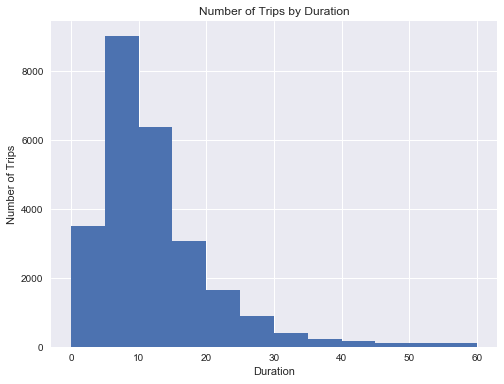

In [32]:
usage_plot(trip_data, 'duration', ['duration < 60'], boundary = 0, bin_width = 5)

Most number of trips were taken in the [5,10] minute trip duration i.e the duration of most number of trips fell within this 5 minute range. Approximately over 8500 trips lasted between 5 and 10 minutes. 

Visual adjustments like this might be small, but they can go a long way in helping you understand the data and convey your findings to others.

## More Analysis

Now that w've done some exploration on a small sample of the dataset, it's time to go ahead and put together all of the data in a single file and see what trends we can find. The code below will use the same `summarise_data()` function as before to process data. After running the cell below, you'll have processed all the data into a single data file. Note that the function will not display any output while it runs, and this can take a while to complete since you have much more data than the sample you worked with above.

In [33]:
station_data = ['201402_station_data.csv',
                '201408_station_data.csv',
                '201508_station_data.csv' ]
trip_in = ['201402_trip_data.csv',
           '201408_trip_data.csv',
           '201508_trip_data.csv' ]
trip_out = 'babs_y1_y2_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, trip_out)

Since the `summarise_data()` function has created a standalone file, the above cell will not need to be run a second time, even if we close the notebook and start a new session. We can just load in the dataset and then explore things from there.

In [34]:
trip_data = pd.read_csv('babs_y1_y2_summary.csv')
display(trip_data.head())

,duration,start_date,start_year,start_month,start_hour,weekday,start_city,end_city,subscription_type
0,1.050000,2013-08-29,2013,8,14,4,San Francisco,San Francisco,Subscriber
1,1.166667,2013-08-29,2013,8,14,4,San Jose,San Jose,Subscriber
2,1.183333,2013-08-29,2013,8,10,4,Mountain View,Mountain View,Subscriber
3,1.283333,2013-08-29,2013,8,11,4,San Jose,San Jose,Subscriber
4,1.383333,2013-08-29,2013,8,12,4,San Francisco,San Francisco,Subscriber


#### Let's explore the new dataset with `usage_stats()` and `usage_plot()` and report our findings! 

In [35]:
usage_stats(trip_data, ['start_city == "San Francisco"'])

There are 603708 data points (90.11%) matching the filter criteria.
The average duration of trips is 17.12 minutes.
The median trip duration is 8.75 minutes.
25% of trips are shorter than 5.92 minutes.
25% of trips are longer than 12.60 minutes.


array([  5.91666667,   8.75      ,  12.6       ])

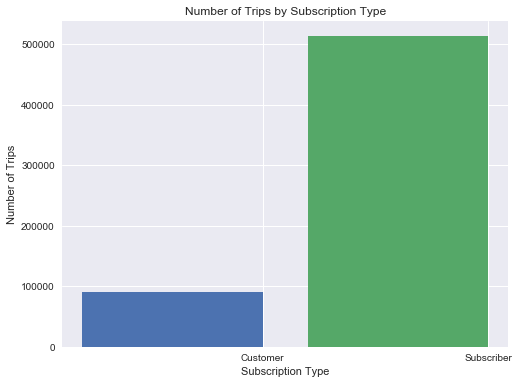

In [36]:
usage_plot(trip_data,'subscription_type', ['start_city == "San Francisco'])

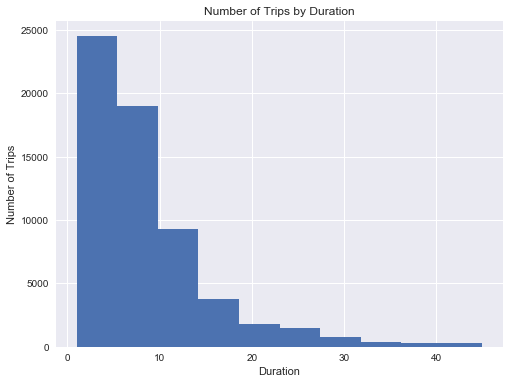

In [37]:
#Final Plot 00
usage_plot(trip_data, 'duration', ['start_city != "San Francisco', 'duration < 45'])

Let's explore some different variables using the functions above and take note of some trends we find. Feel free to create additional cells if you want to explore the dataset in other ways or multiple ways.


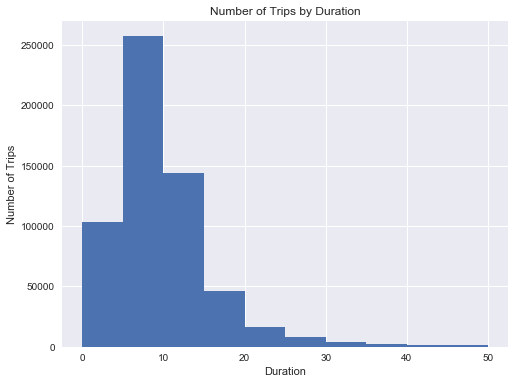

In [38]:
# Final Plot 1
usage_plot(trip_data, 'duration', ['start_city == "San Francisco"', 'duration < 50'], boundary=0, bin_width=5)

 We first filtered the trip data results by city and found that over 90 % of trips started and ended in the city of 
San Francisco. Since the bulk of trips take place in San Francisco, we focus on trips in the city of San Francisco. 

Next, we plotted the number of trips in the city of San Franciso filtered by duration of the trip. We observe that
few trips last beyond 30 minutes, which makes sense as there is a fee to be paid if the trip duration exceeds 30 minutes. 
We also observe that a good chunk of trips last between 5 to 10 minutes and most of the trips last less than 20 minutes.

Based on this visualization we observe that majority of users have a trip duration of less than 20 minutes, 
which approximately would cover approximately 3 miles. This makes sense considering the hilly topography of San Francisco! Moreover, we get an indication that it would perhaps be better for the bike share company to 
reduce the duration when the overtime fees kick in from 30 to, say 25, since very few users go beyond 25 minutes. 

(These observations and recommendation also hold for other cities as can be inferred from "Final Plot 00".)




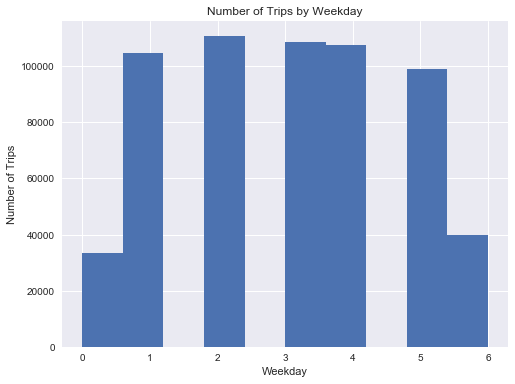

In [39]:
# Final Plot 2
usage_plot(trip_data, 'weekday', ['start_city == "San Francisco"'])

 We now look at the plot of number of trips in San Francisco filtered by the weekday. We see that very few trips
take place on Saturday or Sunday and on weekdays the number of trips are about the same. This is interesting as we can conjecture that users are using bike share primarily for commuting to and from work. 

To test this conjecture, we plot the number of trips in San Francisco filtered by weekday with the constraint that the start time is after 12 p.m and before 4 p.m. The usual office hours are from 9 a.m to 5 p.m and our start hours are within this time period. If our conjecture is true, we will see much reduced number of trips since users will be working during that time period. Moreover, there is not as much reduction in number of users on Saturday or Sunday. This observation would also fit within our hypothesis since Saturday and Sunday being holidays, users would probably have a late start to the day. These observations indeed do hold as can be seen in "Final plot 03".


More confirmation for our hypothesis can be seen from the plot for number of trips in other cities filtered by weekday with the same constraints on start time. (See "Final plot 04")



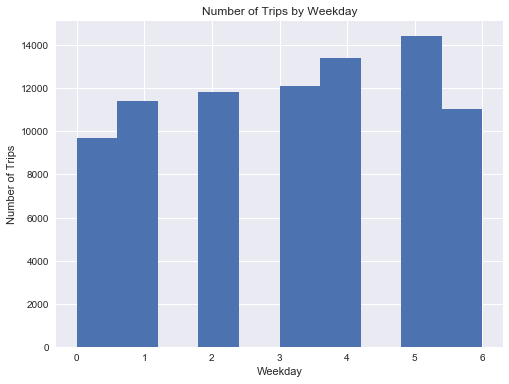

In [40]:
# Final plot 03
usage_plot(trip_data, 'weekday', ['start_city == "San Francisco"','start_hour > 12', 'start_hour < 16'])

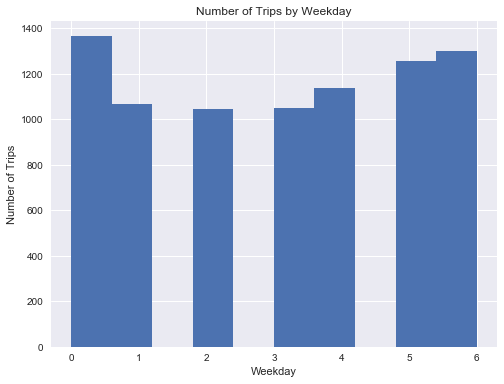

In [41]:
#Final plot 04
usage_plot(trip_data, 'weekday', ['start_city != "San Francisco"', 'start_hour > 12', 'start_hour < 16'])

## Conclusions

This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, we might want to draw conclusions about our data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the code given. Instead of just looking at number of trips on the outcome axis, we could see what features affect things like trip duration. We also haven't looked at how the weather data ties into bike usage.

